In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter ,MultipleLocator

In [292]:
df = pd.read_csv('./datas/canadian_immegration_data.csv')

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [294]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


## <font color=#F0A30A> Analisar as Tendências de imigração
---

In [295]:
df.set_index('Country',inplace=True)

In [296]:
anos = list(map(str,range(1980,2014)))

In [297]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [298]:
brasil = df.loc['Brazil',anos]

In [299]:
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brazil, dtype: object

In [300]:
# Transformando em dtframe
# tolist = converção de uma series em uma lista
brasil_dict = {'ano': brasil.index.tolist(),'imigrantes' : brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [301]:
dados_brasil.head(10)

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


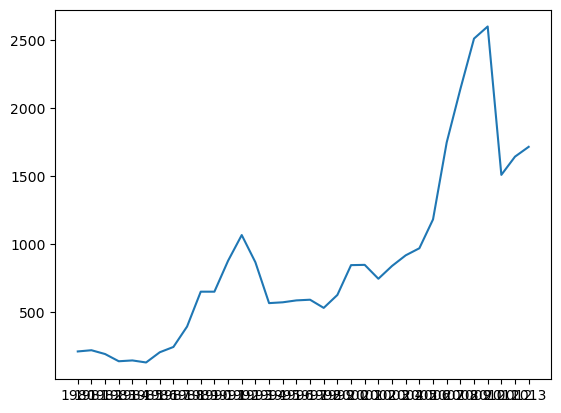

In [302]:
# Primeiro argumento é o eixo na horizontal(eixo x) logo os anos os dados ficaram sobrepostos porem eles são o eixo X.
# uma variavel independente ano no eixo x
plt.plot(dados_brasil['ano'],dados_brasil['imigrantes'])

([<matplotlib.axis.XTick at 0x1cab2256f20>,
 [Text(0.0, 0, '1980'),
  Text(5.0, 0, '1985'),
  Text(10.0, 0, '1990'),
  Text(15.0, 0, '1995'),
  Text(20.0, 0, '2000'),
  Text(25.0, 0, '2005'),
  Text(30.0, 0, '2010')])

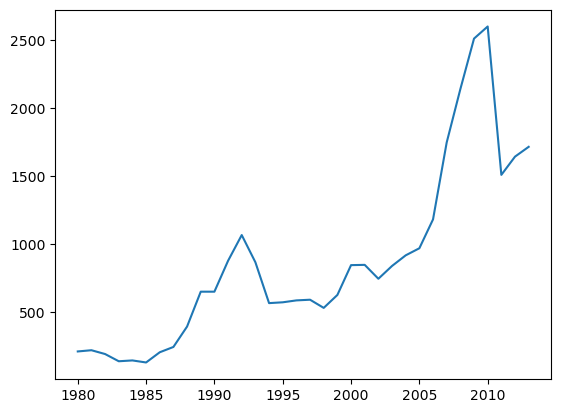

In [303]:
plt.plot(dados_brasil['ano'],dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010']) 

## <font color=#F0A30A> De acordo com Mark podemos aprimorar esse grafico Utilizando AX
---
Uso da API Orientada a Objetos (fig, ax): Como aponta McKinney, essa abordagem é mais explícita. Você sempre sabe em qual gráfico está trabalhando (ax). Se você precisar criar múltiplos gráficos em uma mesma figura (subplots), essa estrutura se torna indispensável e muito mais organizada.

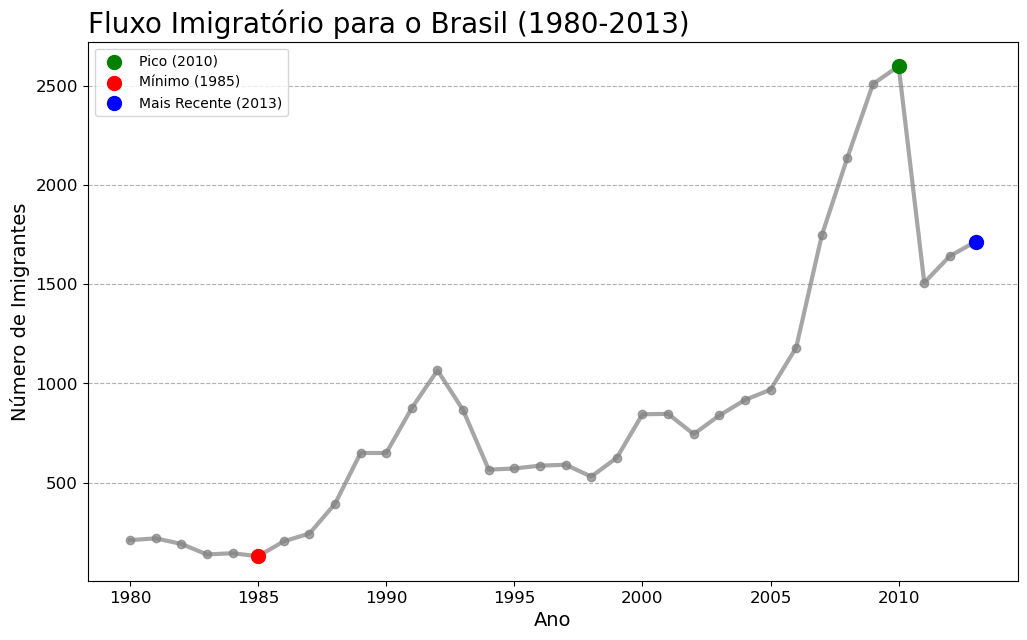

In [304]:
# --- ETAPA 3: LIMPEZA ESSENCIAL DOS DADOS ---

# Esta é uma etapa crucial de pré-processamento, como Wes McKinney sempre
# enfatiza em "Python for Data Analysis". Gráficos e cálculos precisam de
# tipos de dados numéricos.
# A função 'pd.to_numeric()' converte uma coluna que pode estar como texto ('object')
# para um formato numérico (neste caso, 'int64'), permitindo que o Matplotlib
# a posicione corretamente no eixo X e que possamos fazer cálculos com ela.
dados_brasil['ano'] = pd.to_numeric(dados_brasil['ano'])


# --- ETAPA 4: CRIAÇÃO DO GRÁFICO (MÉTODO ORIENTADO A OBJETOS) ---

# Criamos a Figura ('fig', que é a tela em branco) e os Eixos ('ax', que é a
# nossa área de desenho específica) de uma só vez.
# Usar 'fig, ax' nos dá controle explícito sobre cada elemento do gráfico,
# uma prática recomendada para código organizado e customizável.
# 'figsize' controla as dimensões da imagem final em polegadas.
fig, ax = plt.subplots(figsize=(12, 7))


# --- PASSO 4.1: DESENHAR A LINHA PRINCIPAL DE CONTEXTO ---

# Usamos ax.plot() para desenhar a série temporal completa.
# Esta linha servirá como o "contexto" da nossa história.
ax.plot(
    dados_brasil['ano'],         # Eixo X: Os valores da coluna 'ano'
    dados_brasil['imigrantes'],  # Eixo Y: Os valores da coluna 'imigrantes'
    color='gray',                # Cor cinza para a linha, tornando-a menos dominante
    alpha=0.7,                   # Leve transparência (70% opaca) para suavizar a linha
    label='_nolegend_',          # O '_' no início do label instrui o Matplotlib a ignorar esta linha na legenda
    lw=3    ,                    # O 'lw' Aumenta a linha traçada no grafico
    marker='o'                   # O 'marker' Marca com o todos os pontos do grafico 
)


""" 
--- PASSO 4.2: ENCONTRAR OS PONTOS PRINCIPAIS (INSIGHTS) ---

Aqui, usamos o poder do pandas para encontrar os dados que contam nossa história.
Em vez de olhar manualmente, automatizamos a busca por pontos notáveis.

.idxmax() retorna o índice da linha que contém o maior valor na coluna 'imigrantes'.
.loc[] usa esse índice para selecionar e retornar a linha inteira (ano e imigrantes).
"""
pico = dados_brasil.loc[dados_brasil['imigrantes'].idxmax()]

# .idxmin() faz o mesmo, mas para o menor valor.
minimo = dados_brasil.loc[dados_brasil['imigrantes'].idxmin()]

# .iloc[-1] é a forma mais direta de selecionar a última linha do DataFrame,
# independentemente do seu índice. É útil para mostrar o ponto de dados mais recente.
ultimo = dados_brasil.iloc[-1]

"""
 --- PASSO 4.3: DESENHAR OS PONTOS DE DESTAQUE (STORYTELLING) ---

Agora, comunicamos visualmente os insights que encontramos.
'ax.scatter()' é a função perfeita para desenhar pontos individuais sobre o gráfico.
"""

# Desenha o ponto de PICO
ax.scatter(
    x=pico['ano'],        # Coordenada X do ponto
    y=pico['imigrantes'], # Coordenada Y do ponto
    color='green',        # Cor para destaque (verde = positivo, alto)
    s=100,                # 's' (size) controla o tamanho do marcador, tornando-o bem visível
    label=f"Pico ({int(pico['ano'])})", # Texto que aparecerá na legenda
    zorder=5              # 'zorder' define a ordem das camadas. Um valor alto garante que o ponto seja desenhado NA FRENTE da linha cinza.
)

# Desenha o ponto MÍNIMO
ax.scatter(x=minimo['ano'], y=minimo['imigrantes'], color='red', s=100, label=f"Mínimo ({int(minimo['ano'])})", zorder=5)

# Desenha o ponto MAIS RECENTE
ax.scatter(x=ultimo['ano'], y=ultimo['imigrantes'], color='blue', s=100, label=f"Mais Recente ({int(ultimo['ano'])})", zorder=5)


# --- PASSO 4.4: CONFIGURAÇÕES FINAIS E LIMPEZA (CLAREZA) ---

# Adiciona um título claro e informativo, essencial para o contexto.
ax.set_title('Fluxo Imigratório para o Brasil (1980-2013)',fontsize=20,loc='left')

# Adiciona rótulos descritivos para os eixos X e Y.
ax.set_xlabel('Ano',fontsize=14)
ax.set_ylabel('Número de Imigrantes',fontsize=14)
# Adiciona tamanho para os descritivos nos eixos X(anos) e Y(numero de imigrantes).
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


"""
Define os marcadores do eixo X para aparecerem a cada 5 anos,
evitando poluição visual com muitos anos listados.
PODE SER FEITO COM RANGE ou com set_majot_locator(plt.MutipleLocator(5))
ax.set_xticks(range(1980, 2014, 5))
A função MultipleLocator(5) cria uma regra que força o Matplotlib a colocar os marcadores do eixo (ticks) apenas em locais que sejam múltiplos de 5 (0, 5, 10, 15, ...).
"""
ax.xaxis.set_major_locator(MultipleLocator(5)) 

# Adiciona uma grade horizontal sutil para ajudar o olho a seguir os valores do eixo Y.
ax.grid(axis='y', linestyle='--')

# COMANDO FUNDAMENTAL: Ativa a legenda. Sem esta linha, os labels que definimos
# nos pontos de scatter não seriam exibidos.
ax.legend()


""" 
--- ETAPA 5: EXIBIÇÃO DO GRÁFICO ---

Este comando finaliza o processo e renderiza o gráfico completo
na saída da sua célula do Jupyter.
"""
plt.show()

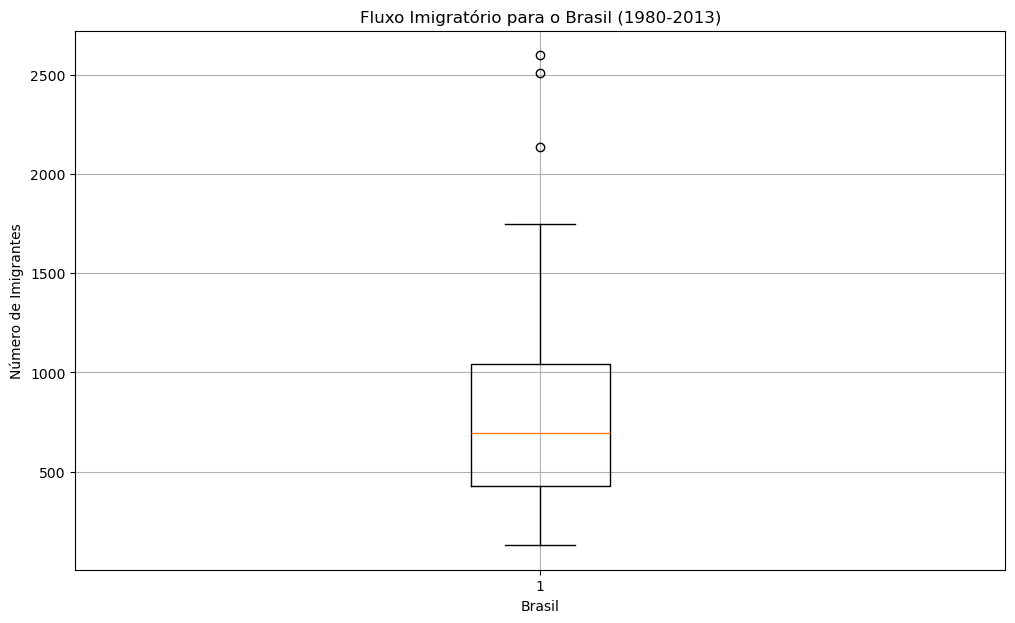

In [305]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.xaxis.set_major_locator(MultipleLocator(5)) 
ax.boxplot(dados_brasil['imigrantes'])
ax.set_title('Fluxo Imigratório para o Brasil (1980-2013)')
ax.set_xlabel('Brasil')
ax.set_ylabel('Número de Imigrantes')
ax.grid()

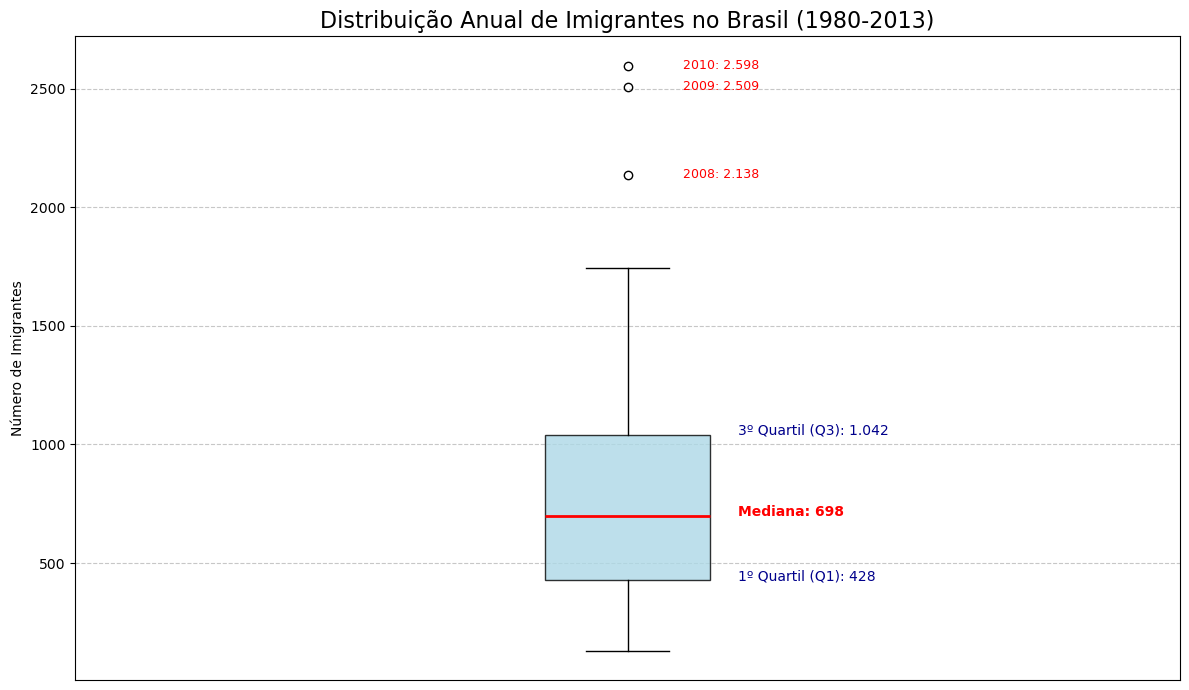

In [306]:
fig, ax = plt.subplots(figsize=(12, 7))

# --- Decisões de Melhoria ---

# 1. O Boxplot como Camada Principal
# Desenhamos o boxplot. 'patch_artist=True' é o que nos permite preenchê-lo com cor.
ax.boxplot(dados_brasil['imigrantes'], patch_artist=True,
           boxprops=dict(facecolor='lightblue', alpha=0.8),
           medianprops=dict(color='red', linewidth=2))

# 2. Título Mais Descritivo (Princípio de Knaflic)
# Um boxplot mostra a 'distribuição' dos dados, não um 'fluxo'. Este título é mais preciso.
ax.set_title('Distribuição Anual de Imigrantes no Brasil (1980-2013)', fontsize=16)

# 3. Limpeza do Eixo X (Princípio de Knaflic)
# O rótulo 'Brasil' é redundante, pois já está no título. Removemos para limpar o visual.
ax.set_xlabel('')
# A marcação "1" que o boxplot cria por padrão no eixo X não tem valor informativo. Removemos também.
ax.set_xticks([])

# 4. Rótulo do Eixo Y (Mantido e Essencial)
# Essencial para entender a escala dos dados.
ax.set_ylabel('Número de Imigrantes')

# 5. Grade Sutil e Funcional (Princípio de Knaflic)
# Uma grade apenas horizontal ('axis='y'') ajuda na leitura dos valores sem poluir o gráfico.
ax.grid(axis='y', linestyle='--', alpha=0.7)


# 6. Adição de Anotações Estatísticas (A Grande Melhoria - Princípios de Fávero e Knaflic)
# Para tornar o gráfico autoexplicativo, adicionamos os valores chave.
# Primeiro, calculamos as estatísticas com pandas.
stats = dados_brasil['imigrantes'].describe()
""" 
A saída mostrará:
 25%    <-- Este é o seu Q1
 50%    <-- Esta é a sua Mediana (Q2 ou mediana)
 75%    <-- Este é o seu Q3
"""
q1 = stats['25%']
mediana = stats['50%']
q3 = stats['75%']
"""
--- LÓGICA PARA ANOTAR OS OUTLIERS ---
eles representam anos em que o número de imigrantes foi excepcionalmente alto, 
muito acima do que foi observado na maioria do período. São os "pontos fora da curva"
 Calculamos os limites para encontrar os outliers
"""
iiq = q3 - q1
limite_superior = q3 + (1.5 * iiq)
limite_inferior = q1 - (1.5 * iiq)
# Filtramos o DataFrame para encontrar as linhas que são outliers.
outliers = dados_brasil[(dados_brasil['imigrantes'] > limite_superior) | (dados_brasil['imigrantes'] < limite_inferior)]
# Percorremos CADA outlier encontrado e adicionamos a anotação completa.
for index, row in outliers.iterrows():
    # Criamos o texto que combina o ano e o número de imigrantes.
    # A formatação ':,.0f' adiciona separador de milhar e remove casas decimais.
    texto_anotacao = f"{int(row['ano'])}: {row['imigrantes']:,.0f}".replace(',', '.')
    
    # Adicionamos o texto ao gráfico na posição do outlier.
    ax.annotate(texto_anotacao,
                (1.05, row['imigrantes']), # Posição (x, y) do texto
                fontsize=9,
                color='red',
                va='center') # Alinha o texto verticalmente com o ponto


# Agora, usamos 'annotate' para escrever esses valores no gráfico.
ax.annotate(f'Mediana: {mediana:,.0f}'.replace(',', '.'),
            xy=(1.1, mediana), xycoords='data', color='red', weight='bold')

ax.annotate(f'3º Quartil (Q3): {q3:,.0f}'.replace(',', '.'),
            xy=(1.1, q3), xycoords='data', color='darkblue')

ax.annotate(f'1º Quartil (Q1): {q1:,.0f}'.replace(',', '.'),
            xy=(1.1, q1), xycoords='data', color='darkblue')


# Adicionamos um comando para garantir que tudo se ajuste bem
plt.tight_layout()

# O comando final para exibir, caso seja necessário na sua célula.
plt.show()

In [307]:
dados_brasil[['imigrantes']].describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


## <font color=#F0A30A> Analisando Países
---


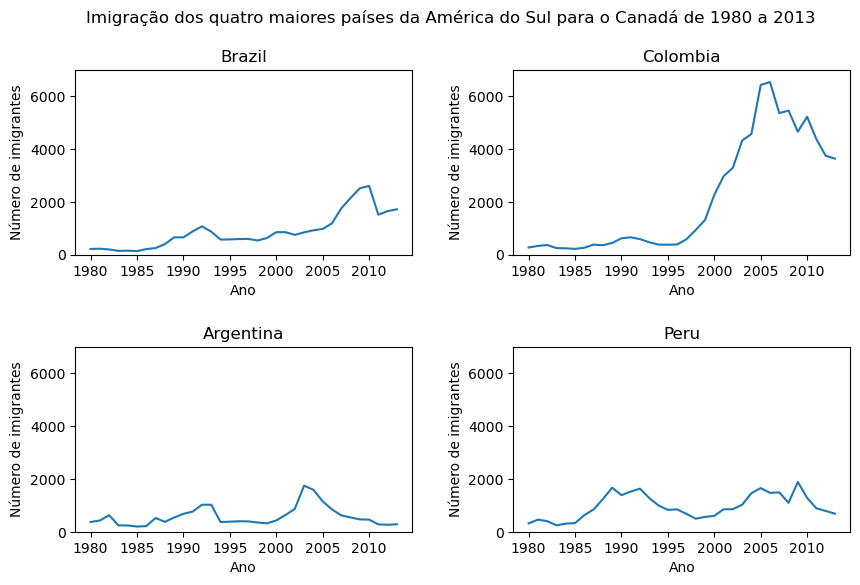

In [308]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
#Titulo geral
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013') 

axs[0,0].plot(df.loc['Brazil', anos])
axs[0,0].set_title('Brazil')

axs[0,1].plot(df.loc['Colombia', anos])
axs[0,1].set_title('Colombia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de imigrantes')


# Define o valor mínimo (ponto de partida) para o eixo Y.
ymin = 0
# Define o valor máximo (ponto final) para o eixo Y.
ymax = 7000
"""
Inicia um loop que passará por cada um dos seus gráficos (eixos) na figura.
axs.ravel()' transforma a grade de gráficos (ex: 2x2) em uma lista simples,
facilitando a iteração por todos eles de uma só vez.
"""
for ax in axs.ravel():
  # Para cada gráfico ('ax') individualmente dentro do loop,
  # aplica os limites mínimo e máximo ao seu eixo Y.
  ax.set_ylim(ymin, ymax)

plt.show()

In [309]:
south_america = df.query('Region == "South America"')

In [310]:
south_america

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,Latin America and the Caribbean,South America,Developing regions,1233,1069,1078,781,681,533,633,...,384,427,530,350,375,340,174,291,273,21359
Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,257,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Ecuador,Latin America and the Caribbean,South America,Developing regions,238,207,184,155,179,208,240,...,491,525,419,437,373,353,348,282,418,12233
Guyana,Latin America and the Caribbean,South America,Developing regions,2334,2943,3575,2650,1932,2299,3942,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguay,Latin America and the Caribbean,South America,Developing regions,45,26,32,40,48,36,34,...,75,88,98,95,88,89,83,55,66,1944
Peru,Latin America and the Caribbean,South America,Developing regions,317,456,401,241,306,328,628,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


In [311]:
south_america.index = south_america.index.str.split('(').str[0].str.strip()
#Limpando o () de cada pais para poder mostralos no grafico

In [312]:
#Ordenaremos do Maior para o Menor para que o grafico de barras saia com um visual perfeito 
south_america = south_america.sort_values('Total',ascending=True)

In [313]:
south_america

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Suriname,Latin America and the Caribbean,South America,Developing regions,15,10,21,12,5,16,7,...,15,16,20,9,12,13,11,16,4,739
Paraguay,Latin America and the Caribbean,South America,Developing regions,45,26,32,40,48,36,34,...,75,88,98,95,88,89,83,55,66,1944
Bolivia,Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
Uruguay,Latin America and the Caribbean,South America,Developing regions,128,132,146,105,90,92,137,...,217,175,147,160,99,93,81,47,58,4715
Ecuador,Latin America and the Caribbean,South America,Developing regions,238,207,184,155,179,208,240,...,491,525,419,437,373,353,348,282,418,12233
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Venezuela,Latin America and the Caribbean,South America,Developing regions,103,117,174,124,142,165,179,...,1211,1192,1335,1239,1353,998,1452,1373,1022,21267
Chile,Latin America and the Caribbean,South America,Developing regions,1233,1069,1078,781,681,533,633,...,384,427,530,350,375,340,174,291,273,21359
Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659


## <font color=#F0A30A> Grafico de quantidade
---
Grafico de barras


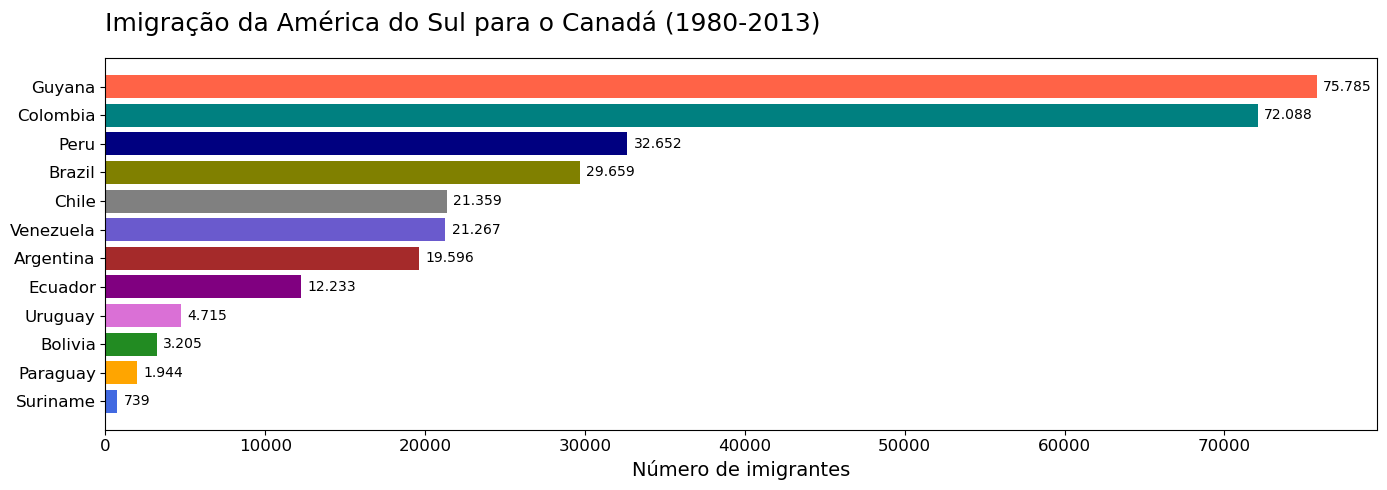

In [316]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
fig, ax = plt.subplots(figsize=(14, 5))

""" 
  PLOTAR AS BARRAS HORIZONTAIS
  Usamos 'ax.barh()' que é ideal para rótulos longos como nomes de países.
  Os dados são puxados diretamente do seu DataFrame ordenado, como você mencionou.

"""
ax.barh(south_america.index, south_america['Total'], color=cores)

"""
  ADICIONAR RÓTULOS DE DADOS PRECISOS (Princípio de Knaflic)
  Este loop percorre cada barra e adiciona o valor exato no final,
  formatando o número para melhor leitura.
"""
for index, value in enumerate(south_america['Total']):
    label_texto = f'{value:,.0f}'.replace(',', '.')
    ax.text(value + 400, index, label_texto, ha='left', va='center', fontsize=10)

# LIMPAR E CONTEXTUALIZAR O GRÁFICO (Princípio de Knaflic)
# Título claro e posicionado à esquerda.

ax.set_title('Imigração da América do Sul para o Canadá (1980-2013)', loc='left', fontsize=18, pad=20)

# Removemos rótulos e elementos desnecessários para reduzir o "ruído".

ax.set_ylabel('')
ax.set_xlabel('Número de imigrantes', fontsize=14)

ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Garante que todos os elementos do gráfico se encaixem bem.

plt.tight_layout()

# Exibe o gráfico final.

plt.show()

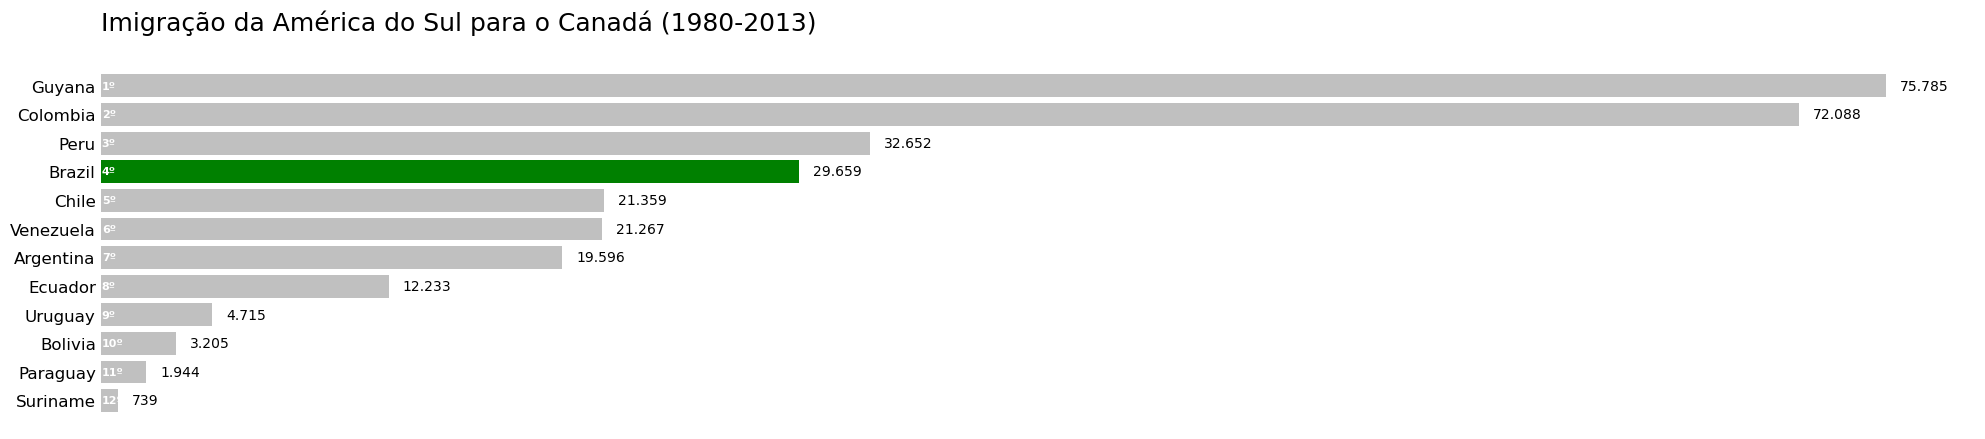

In [369]:
# Se quisermos selecionar apenas um valor no grafico para resalta-lo podemos fazer isso com for 
# vamos para o exemplo

cores = [] # Mudaremos as cores para uma lista vazia e iremos interar ela com um for 

pais_destacado = 'Brazil' 
cor_destaque = 'green'
cor_base = 'silver'

# Iteramos por cada país no índice do seu DataFrame
for pais in south_america.index:
    # Se o país atual for o que queremos destacar...
    if pais == pais_destacado:
        # ...adicionamos a cor de destaque.
        cores.append(cor_destaque)
    # Senão (para todos os outros países)...
    else:
        # ...adicionamos a cor base.
        cores.append(cor_base)

fig, ax = plt.subplots(figsize=(20, 5))

""" 
  PLOTAR AS BARRAS HORIZONTAIS
  Usamos 'ax.barh()' que é ideal para rótulos longos como nomes de países.
  Os dados são puxados diretamente do seu DataFrame ordenado, como você mencionou.

"""
ax.barh(south_america.index, south_america['Total'], color=cores, height=0.8)

"""
  ADICIONAR RÓTULOS DE DADOS PRECISOS (Princípio de Knaflic)
  Este loop percorre cada barra e adiciona o valor exato no final,
  formatando o número para melhor leitura.
"""
for index, value in enumerate(south_america['Total']):
    label_texto = f'{value:,.0f}'.replace(',', '.')
    ax.text(value + 600, index, label_texto, ha='left', va='center', fontsize=10)

# LIMPAR E CONTEXTUALIZAR O GRÁFICO (Princípio de Knaflic)
# Título claro e posicionado à esquerda.

ax.set_title('Imigração da América do Sul para o Canadá (1980-2013)', loc='left', fontsize=18, pad=20)

# Removemos rótulos e elementos desnecessários para reduzir o "ruído".

ax.set_ylabel('')
ax.set_xlabel('Número de imigrantes', fontsize=14)

ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)


# O loop irá adicionar o número do ranking no início de cada barra.

total_barras = len(south_america)
for index, value in enumerate(south_america['Total']):
    # Calculamos o ranking de forma invertida.
    # A barra do topo (que tem o maior índice, ex: 11) se tornará a 1ª.
    # A barra de baixo (índice 0) se tornará a última (ex: 12ª).
    ranking = total_barras - index
    label_texto = f"{ranking}º"
    
    # Posicionamos o texto no INÍCIO da barra para um visual limpo.
    ax.text(x=50, y=index, s=label_texto,
            color='white', weight='bold', fontsize=8,
            ha='left', va='center')

# Garante que todos os elementos do gráfico se encaixem bem.

plt.tight_layout()

# Exibe o gráfico final.

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both',which='both',length=0)


plt.show()


## <font color=#F0A30A> Exportando os Graficos
---



In [ ]:
print(fig.canvas.get_supported_filetypes()) #Assim obtemos um dicionario em quais os tipos que podemos exportar os nossos graficos;

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


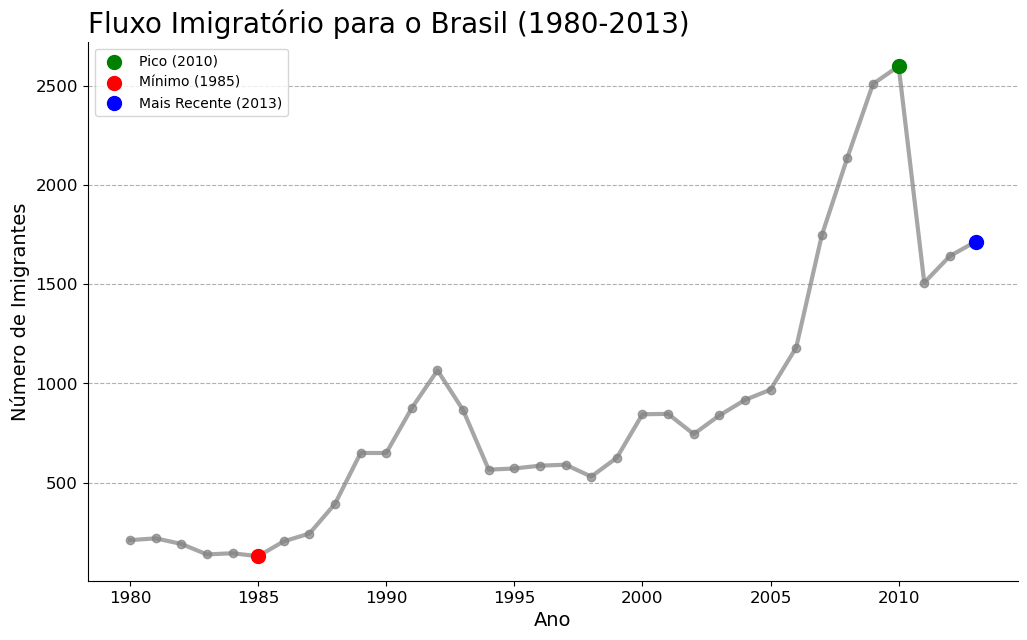

In [373]:
dados_brasil['ano'] = pd.to_numeric(dados_brasil['ano'])
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(
    dados_brasil['ano'],         
    dados_brasil['imigrantes'],  
    color='gray',               
    alpha=0.7,                
    label='_nolegend_',          
    lw=3    ,                   
    marker='o'                   
)
pico = dados_brasil.loc[dados_brasil['imigrantes'].idxmax()]
minimo = dados_brasil.loc[dados_brasil['imigrantes'].idxmin()]
ultimo = dados_brasil.iloc[-1]
ax.scatter(
    x=pico['ano'],        
    y=pico['imigrantes'], 
    color='green',        
    s=100,                
    label=f"Pico ({int(pico['ano'])})", 
    zorder=5             
)
ax.scatter(x=minimo['ano'], y=minimo['imigrantes'], color='red', s=100, label=f"Mínimo ({int(minimo['ano'])})", zorder=5)
ax.scatter(x=ultimo['ano'], y=ultimo['imigrantes'], color='blue', s=100, label=f"Mais Recente ({int(ultimo['ano'])})", zorder=5)
ax.set_title('Fluxo Imigratório para o Brasil (1980-2013)',fontsize=20,loc='left')
ax.set_xlabel('Ano',fontsize=14)
ax.set_ylabel('Número de Imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(MultipleLocator(5)) 
ax.grid(axis='y', linestyle='--')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight') #Aqui nos salvamos o grafico em png com dpi de 300 e bboxinches seria para ajustar os limites da figura ao grafico
plt.show()